# Aprendizaje **NO** supervisado: Agrupamiento Jerárquico

Durante este cuadernillo veremos la técnica de _Agrupamiento Jerárquico_, perteneciente al grupo de aprendizaje **NO** supervisado.

Recuerda que este tipo de aprendizaje nos permite separar nuestro conjunto de datos en distintos grupos (se llaman _técnicas de agrupación_).

## Introducción teórica

Los _Agrupamientos Jerárquicos_ son una familia de técnicas que parten de un conjunto completamente dividido e, iterativamente, van reduciendo el número de grupos hasta la cantidad deseada.

En la práctica, esto es equivalente a aplicar ```n_total - n_grupos``` veces el algoritmo, formando un nuevo grupo con aquellos puntos más cercanos.

## Uso computacional

Vamos a ver ahora cómo podemos utilizar este algoritmo.

Para este cuadernillo, vamos a utilizar una función que genera _datasets_ aleatorios. No trabajaremos, por tanto, con datos reales, pero me permitirá enseñarte cómo se puede crear un conjunto de datos rápidamente para hacer pruebas con nuevas técnicas.

## Generación del conjunto de datos

Para generar un conjunto de datos, usaremos las funciones existentes en ```sklearn.datasets```. En particular, en este cuadernillo usaremos la función ```make_blobs```, que crea grupos en forma de burbuja.

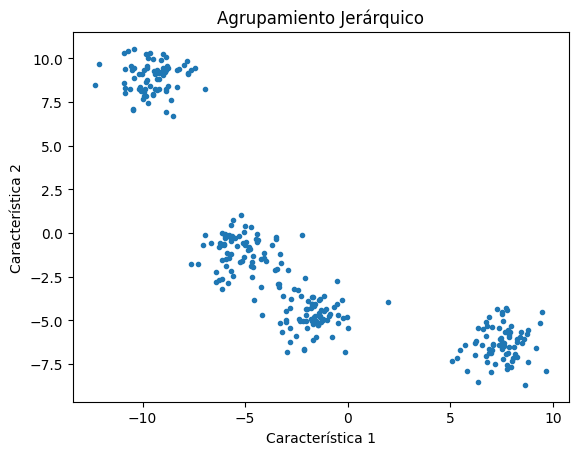

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# Semilla aleatoria
random_seed = 33

# Generar datos de ejemplo. El resultado (y) lo vamos a ignorar, por eso uso la variable "_"
X, _ = make_blobs(n_samples=300, centers=4, random_state=random_seed)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.title('Agrupamiento Jerárquico')
plt.xlabel('Característica 1') # se pueden personalizar los gráficos
plt.ylabel('Característica 2')
plt.show()

El objetivo, ahora, es separar estos datos en grupos usando un Agrupamiento Jerárquico.

## Limpieza de datos

Como nuestro conjunto de datos es generado, no necesitamos limpiarlo.

## Aplicación del Agrupamiento Jerárquico

Como siempre, lo importamos de ```sklearn```.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Creo y entreno mi primer modelo. La predicción del mismo es una lista de etiquetas (los grupos).

Fíjate en el comentario de la creación del modelo. Los métodos jerárquicos **SON** deterministas.

Se dice que un modelo es **determinista** si, independientemente de cuándo sea ejecutado, proporciona la misma solución (la solución está determinada).

Por ejemplo, los métodos jerárquicos solo dependen de cómo sean los datos y de sus parámetros de entrada. Sin embargo, otros modelos, como el _KMeans_, sí dependía, en cierto sentido, de la "suerte" a la hora de elegir la posición inicial de los **centroides**.

In [ ]:
model = AgglomerativeClustering(n_clusters=4) # los métodos jerárquicos SON deterministas
pred = model.fit_predict(X)
pred

array([0, 3, 0, 0, 3, 2, 3, 1, 1, 2, 1, 2, 2, 1, 0, 3, 1, 0, 1, 2, 0, 2,
       3, 3, 1, 0, 2, 3, 1, 2, 0, 1, 1, 2, 3, 3, 3, 0, 0, 2, 3, 0, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 0, 1, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       3, 2, 1, 2, 3, 3, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0, 1, 2,
       3, 2, 3, 1, 1, 3, 0, 1, 1, 0, 2, 1, 3, 2, 1, 1, 3, 1, 0, 1, 1, 3,
       1, 1, 0, 2, 2, 3, 1, 3, 1, 2, 3, 1, 3, 2, 3, 3, 0, 0, 2, 3, 3, 1,
       2, 0, 3, 0, 0, 2, 2, 3, 1, 2, 3, 2, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0,
       0, 3, 2, 3, 1, 1, 0, 3, 3, 0, 3, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 3,
       0, 1, 3, 3, 2, 3, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 3, 2,
       2, 0, 3, 3, 1, 3, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 2, 1, 3, 0, 2, 1,
       2, 1, 3, 2, 2, 0, 2, 2, 0, 3, 3, 2, 2, 0, 2, 1, 0, 1, 3, 1, 3, 3,
       3, 2, 0, 3, 2, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 3, 2, 2, 3,
       1, 1, 3, 3, 2, 0, 0, 3, 0, 0, 2, 0, 2, 3, 3, 0, 3, 0, 1, 1, 1, 0,
       2, 2, 0, 2, 2, 1, 2, 1, 1, 3, 2, 0, 2, 0])

Finalmente, podemos ver un gráfico con el resultado. Como ```pred``` es una lista de números, podemos usarla como color.

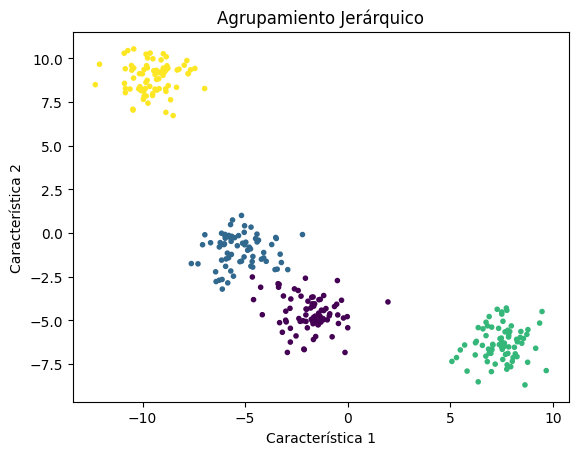

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=pred, marker='.')
plt.title('Agrupamiento Jerárquico')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

## Profundización

Habiendo visto el ejemplo incial, vamos a ver los hiperparámetros específicos para el agrupamiento jerárquico.

A la hora de crear el objeto _AgglomerativeClustering_, podemos establecer:
- ```n_clusters```: el número de grupos deseados. Por defecto ```2```.
- ```metric```: métrica utilizada para calcular la distancia, puede ser una de:
  - ```manhattan``` o ```l1``` (1): mínima distancia sin tomar diagonales (2).
  - ```euclidean``` o ```l2```: pitágoras.
  - ```cosine```: [distancia del coseno](https://en.wikipedia.org/wiki/Cosine_similarity).
  - ```precomputed```: una matriz precalculada de distancias.
- ```connectivity```: en tal caso, la matriz precalculada.
- ```linkage```: criterio de unión en cada iteración, cada una mide la:
  - ```ward```: varianza entre grupos.
  - ```complete```: distancia máxima entre grupos (entre sus puntos más alejados).
  - ```average```: distancia media entre los **centroides** de los grupos.
  - ```single```: distancia mínima entre los grupos (puntos más cercanos).

(1). Se les llama métricas ```l1```, ```l2```, ..., ```ln``` porque usan la misma fórmula de pitágoras, pero elevando los términos a distintas potencias. Así pues, en un problema de ```m``` dimensiones:

$$
D(s, t) = \sqrt[n]{\sum_{i=1}^{m} |t_i - s_i|^n}
$$

Fíjate en que si ```n=2``` tienes la fórmula de pitágoras.

(2). Se llama distancia ```manhattan``` porque es la distancia que se usa para medir dos puntos en una ciudad, dado que no se permite tomar diagonales (pasar entre los edificios).

## Visualización

Dado que este método realiza un número exacto de iteraciones jerarquizadas, se puede crear un método que muestre el árbol global de la jerarquía. Estos árboles se llaman **dendogramas**. Podemos usar la librería ```scipy``` para mostrar un ejemplo.

Para crear el dendograma, necesitamos dos objetos: la matriz de distancias (que lo he llamado ```linked```) y las predicciones del modelo (almacenadas en la varaible ```pred```).

La matriz de distancias se calcula añadiendo una fila-columna por cada instancia del conjunto de datos. Para esa instancia (dato) se calcula la distancia usando una métrica y un método de enlace (```linkage```) establecidos. Por ejemplo, en la siguiente celda uso la métrica euclídea y el enlace de la varianza.

Finalmente, usando esas distancias entre los valores y las predicciones del modelo, podemos crear el **dendograma** que nos indique cuándo se han unido cada uno de los valores de nuestro conjunto de datos.

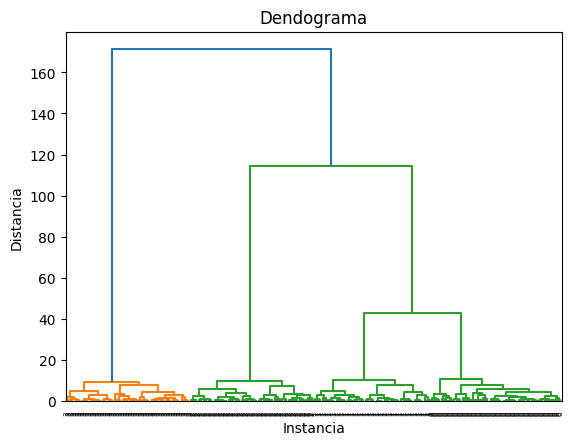

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Creamos la matriz de distancias
linked = linkage(X, metric="euclidean", method='ward')

# Creamos el dendograma (esto, realmente, es casi obtener el resultado del modelo)
plt.figure()
dendrogram(linked, labels=pred) # con las predicciones del modelo
plt.title("Dendograma")
plt.xlabel("Instancia")
plt.ylabel("Distancia")
plt.show()

Aunque los colores se vuelvan un poco locos, se puede ver perfectamente que, a la misma altura, se han formado 4 grupos. Estos son los grupos perfectamente identificados en nuestro gráfico inicial.

## Optimización

Si queremos buscar otro tipo de soluciones a nuestro problema, podremos mejorar nuestros datos o modificar los valores tomados para ```metric``` y ```linkage```.

Tal y como hicimos para el _KMeans_, en aprendizaje **NO** supervisado siempre es buena idea estandarizar el conjunto de datos.

### 1ª idea: estandarizar el conjunto de datos

Usamos la clase ```StandardScaler```.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
_X = ss.fit_transform(X) # como no tengo conjunto de testeo, no me preocupo en separar el fit del transform

Ahora entreno con los datos estandarizados

In [ ]:
model = AgglomerativeClustering(n_clusters=4)
pred = model.fit_predict(_X)

Muestro mis resultados.

A diferencia que con _KMeans_, aquí no observamos ninguna diferencia. Esto es porque el _dataset_ que estamos utilizando solo tiene dos dimensiones. El _dataset_ con el que trabajamos para _KMeans_ tenía más de 5.

Recuerda: **la maldición de la dimensionalidad**.

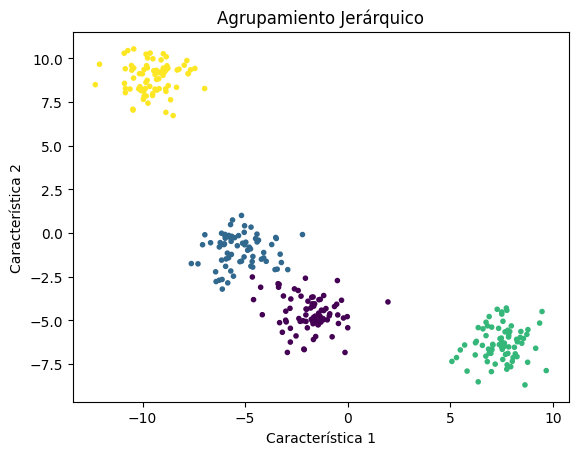

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=pred, marker='.')
plt.title('Agrupamiento Jerárquico')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

### 2ª idea: optimizar el modelo

Ahora, por primera vez, nos vamos a enfrentar a un problema de **optimización** de **hiperparámetros**, pero, antes, _¿qué era un hiperparámetro?_

Recuerda: un **hiperparámetro** era un parámetro de construcción del modelo. No se deben confundir con los parámetros internos de los modelos que son usados para obtener los resutados. En general, estos **hiperparámetros** definen la estructura o el comportamiento de nuestros modelos y, por ello, tiene sentido **buscar la mejor combinación**.

Esta tarea puede abordarse de muchas formas distintas, pero no vamos a poder sacar todo el potencial de la misma en un trabajo de **Aprendizaje NO Supervisado**. Por ello, veremos ahora una estrategia básica (```Grid search```) y dejaremos las demás (```Random Search```, ```Búsqueda Bayesiana```, ```Algoritmos genéticos```, ```Algoritmos naturales```...) para más adelante.

La técnica de ```Grid Search``` es la más ineficiente e intuitiva de todas: si tenemos una combinación de posibilidades finitas (categóricas =), simplemente probemos todas.

En nuestro caso:
- ```metric```: ```manhattan```, ```euclidean``` y ```cosine```.
- ```linkage```: ```ward```, ```complete```, ```average```,```single```.

Fíjate que, por ello, tendremos que entrenar ```3·4=12``` modelos distintos (unos pocos menos, dado que el enlace ```ward``` solo puede combinarse con la métrica ```euclidean```). Es decir: esto se puede **ir de madre** muy rápidamente.

Para elegir el mejor algoritmo, buscaremos aquél en el que los grupos esten más compactos (la distancia a sus **centroides** sea mínima). Para hacer esto, usaremos la métrica _inertia_, que ya hemos visto con KMeans y ya sabemos cómo funciona.

Como único detalle adicional, debemos recordar que los centroides no se definen de la misma forma en KMeans y en el Agrupamiento Jerárquico, por eso, debemos determinarlos como la media de todos los puntos (el centro de masas). Si por cualquier razón, estos puntos tuviesen una **ponderación**, deberíamos modificar este método para que nos diese un resultado dependiendo del peso de cada punto.

In [ ]:
import numpy as np

def inertia(X, labels):
    n_clusters = len(np.unique(labels))
    inertia_value = 0

    for i in range(n_clusters): # para cada grupo
        cluster_points = X[labels == i] # filtro sus puntos
        centroid = np.mean(cluster_points, axis=0) # determino su centroide
        inertia_value += np.sum((cluster_points - centroid)**2) # obtengo la inercia

    return inertia_value

In [ ]:
n_clusters = 4
results = []

for linkage in ["ward", "complete", "average", "single"]:
  for metric in ["manhattan", "euclidean", "cosine"]:
    if linkage == "ward" and metric != "euclidean": continue # metric restriction

    model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage, compute_distances = True) # el modelo actual
    pred = model.fit_predict(_X) # los datos estandarizados

    t_inertia = inertia(_X, pred)

    # simplemente sumo las inercias para este modelo jerárquico
    print(f"La combinación {metric} + {linkage} ha tenido una inercia total de {t_inertia}.")
    results.append(t_inertia)

La combinación euclidean + ward ha tenido una inercia total de 15.299246947150069.
La combinación manhattan + complete ha tenido una inercia total de 14.976125818760199.
La combinación euclidean + complete ha tenido una inercia total de 16.329491796008448.
La combinación cosine + complete ha tenido una inercia total de 20.601061009184868.
La combinación manhattan + average ha tenido una inercia total de 15.730659099361601.
La combinación euclidean + average ha tenido una inercia total de 15.940122149448946.
La combinación cosine + average ha tenido una inercia total de 21.0344123578438.
La combinación manhattan + single ha tenido una inercia total de 38.86128658160195.
La combinación euclidean + single ha tenido una inercia total de 38.86128658160195.
La combinación cosine + single ha tenido una inercia total de 41.176072981686936.


Recuerda que la ```inercia``` es una métrica que debe minimizarse (cuanto más alta sea, peor). Por lo que la mejor combinación para este conjunto de datos es la que usa la métrica ```manhattan``` junto al enlace ```complete```.

In [ ]:
model = AgglomerativeClustering(n_clusters=n_clusters, metric="manhattan", linkage="complete")
pred = model.fit_predict(_X)

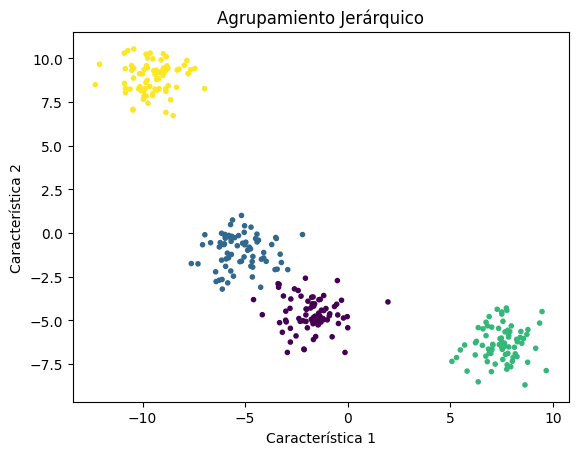

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=pred, marker='.')
plt.title('Agrupamiento Jerárquico')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

Que posiblemente determine de mejor forma algún puntito central.

No te preocupes: para aplicar las técnicas de ```Grid Search``` no lo haremos de forma manual (aunque ahora ya sabes hacerlo si lo necesitas), sino que usaremos funciones ya predefinidas.

# Resumen

Durante este cuadernillo hemos aprendido bastantes cosas nuevas.

- Con la escusa de ver el método de Agrupamiento Jerárquico, hemos visto un nuevo algoritmo de **Aprendizaje NO Supervisado** - También hemos visto un nuevo tipo de gráfico: los **dendogramas**.
- Hemos insistido en la idea de que los métodos de **ANS** mejoran sus resultados tras **estandarizar** los datos.
- Hemos aprendido cómo se puede optimizar un modelo de Inteligencia Artificial (hemos metido el hocico, mejoraremos esto en el futuro; la optimización de hiperparámetros es una rama entera dentro de la IA...).

Durante el siguiente cuadernillo veremos el último modelo de **ANS** que veremos en el curso.